<a href="https://colab.research.google.com/github/Smruthi3/END2/blob/main/Session3-Assignment/Session_3_Assignment_smruthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a neural network that can:
* Take 2 inputs:
  1. an image from MNIST dataset, and
  2. a random number between 0 and 9
* And gives two outputs:
  1. the "number" that was represented by the MNIST image, and
  2. the "sum" of this number with the random number that was generated and sent as the input to the network


![image](https://drive.google.com/file/d/1tlNRJeYKzXiZW4jnhfHRYKal3l78cW4x/view?usp=sharing)

* you can mix fully connected layers and convolution layers
* you can use one-hot encoding to represent the random number input as well as the "summed" output. 

### Importing MNIST data set

In [ ]:
## Importing required libraries
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
# Uploading MNIST dataset

train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [ ]:
## Printing length of MNIST data set
len(train_set)

60000

In [ ]:
## Observing distinct image lables
train_set.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
## Type of the dataset and number of samples from each image label
print(type(train_set[0]))
print(train_set.train_labels.bincount())

<class 'tuple'>
tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
### Sending data to dataloader to view the images in batch
input_train_loader1 = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

In [ ]:
batch = next(iter(input_train_loader1))
images , labels = batch
print(len(batch),type(batch))
print(images.shape, labels.shape)

2 <class 'list'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels: tensor([0, 2, 5, 1, 2, 5, 8, 7, 2, 8])


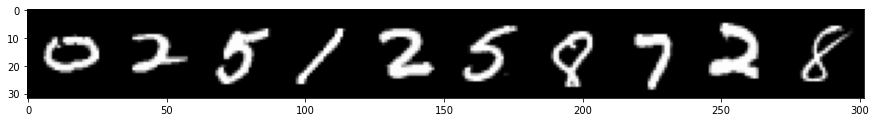

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

### Data Gerenation and Represntation strategy
Generating a Dataframe with two columns
1. input = Numbers from 0 to 9
2. output = Possible outcomes thats possible from summing up random numbers from 0 to 9 with MNIST data labels 0 to 9 
3. Repeating this sample to 600 times to match the MNIST dataset length
4. Custom data generation class is written to combine image and random numbder data by extending pytorch's Dataset class
  * The random data set's input is converted into one hot encoding tensor
  * This class returns the two inputs, image and random number (in one hot format) and two outputs, image label and summed output 

In [ ]:
## For loop to generate random number and summed output dataset
import pandas as pd
input = []
output = []
for i in range(0,10):
  for j in range(0,10):
    input.append(i)
    output.append(i+j)
    
random_number_df=pd.DataFrame({'Input': input,
              'Output': output}) 

In [ ]:
random_number_df.shape

(100, 2)

In [ ]:
random_number_df.head(10)

,Input,Output
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9


In [ ]:
### Repeating samples 600 times
random_number_df=pd.concat([random_number_df]*600,ignore_index=True)

In [ ]:
random_number_df.shape

(60000, 2)

In [ ]:
### Customer dataset generator class 
from torch.utils.data import Dataset
class RandomNumberdata(Dataset):
  def __init__(self, img_df,input_df,):
    self.img = img_df
    self.data = input_df

  def __getitem__(self, index):
    
    images = self.img[index][0]
    output1 = self.img[index][1]

    r = self.data.iloc[index]
    input_onehot = torch.nn.functional.one_hot(torch.tensor(self.data.Input,dtype=torch.long)) ## converting to one hot encoding
    output = torch.tensor(self.data.Output,dtype=torch.long)
    #output_onehot = torch.nn.functional.one_hot(torch.tensor(self.data.Output,dtype=torch.long))
    output2 = output[r[0]]
    sample = input_onehot[r[1]]
    return images, output1, sample, output2 ## returning 4 objects as mentioned above
  
  def __len__(self):
    return len(self.data)

In [ ]:
## Calling an instance of custom dataset class
combined_data_set = RandomNumberdata(train_set,random_number_df)

In [ ]:
print(len(combined_data_set))


60000


In [ ]:
## View of one record from combined dataset 
combined_data_set[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [ ]:
# combined_data_loader = torch.utils.data.DataLoader(combined_data_set, batch_size=10)

# batch = next(iter(combined_data_loader))
# images , output1, numbers,output2 = batch
# print(len(batch),type(batch))
# print(images.shape, output1.shape,numbers.shape, output2.shape)

### Building neural network here
The network consists of 2 conv2d layers, 4 linear layers 

1. The image is passed as a first input to network with consists of 2 conv2d layers followed by one linear layer with approriate activation function at each layer
2. The random number passed as second input linear with layer with approriate activation function at each layer
3. First and second inputs are combined using torch.cat function 
4. Concatenated input is sent to 3rd liner layer followed by softmax activation function to get first output
5. The same  concatenated input is sent to 4th liner layer followed by softmax activation function to get second output
6. Finally two outputs, image label and summed output are returned from the network


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)

        self.fc2 = nn.Linear(in_features=10, out_features=120)

        self.out1 = nn.Linear(in_features=240, out_features=10)

        self.out2 = nn.Linear(in_features=240, out_features=19)

    def forward(self, img, rand): ## Passing two inputs here 
        
        img = self.conv1(img)
        img = F.relu(img)
        img = F.max_pool2d(img, kernel_size=2, stride=2)

     
        img = self.conv2(img)
        img= F.relu(img)
        img= F.max_pool2d(img, kernel_size=2, stride=2)


        img = img.reshape(-1, 12 * 4 * 4)
        img = self.fc1(img)
        img = F.relu(img)


        rand = self.fc2(rand)
        rand = F.relu(rand)

        combined = torch.cat((img,rand),dim=1) ## combining two inputs here

        #print(combined.shape)

        out1 = self.out1(combined)
        out1 = F.softmax(out1, dim=1) ## output1, image label


        out2=self.out2(combined)
        out2 = F.softmax(out1, dim=1) ## output2, summed output

        return out1,out2

In [ ]:
## Enabling the GPU 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)



cuda:0


### Generating train and test loaders by  SubsetRandomSampler
1. Data is split into 80% train and 20% test 
2. Model data is trained using training set and its perfomance is evaluated on test 
3. Cross entropy is used as loss function for both the output, because we are solving a classification problem and The purpose of the Cross-Entropy is to take the output probabilities (P) and measure the distance from the truth values
4. Based on loss and accuracy model perfomance is evaluated 

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 100
test_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and test splits:
dataset_size = len(combined_data_set)
indices = list(range(dataset_size))
split = int(np.floor(test_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]

# Creating  data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
testid_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(combined_data_set, batch_size=batch_size, 
                                           sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(combined_data_set, batch_size=batch_size,
                                                sampler=testid_sampler)

In [ ]:
len(train_loader),len(test_loader)

(480, 120)

In [ ]:
import torch.optim as optim
network = Network()
network = network.to(device) ## Adding network to gpu
optimizer = optim.Adam(network.parameters(), lr=0.01) ## Defining an optimizer

In [ ]:
## Defining accuracy function here
def accuracy(preds, labels):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    correct = preds.argmax(dim=1).eq(labels).sum().item() #convert into float for division 
    acc = correct / len(labels)
    return acc

In [ ]:
## Defined the train function here which takes network, data iterator, optimizer and device
## Trains the network batch wise
def train(model, iterator, optimizer,device):
    
    epoch_loss = 0
    epoch_acc1 = 0
    epoch_acc2 = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()

        images, output1, numbers,output2 = batch 
        images, output1, numbers,output2 = images.to(device), output1.to(device), numbers.to(device),output2.to(device) ## Adding all inputs to gpu

       # print(images.shape)
       # print(numbers.shape)

        preds1,preds2 = model(images.float(),numbers.float()) # Pass Batch
        
        #preds1,preds2 = network(images.float().to(device),numbers.float().to(device))

        loss1 = F.cross_entropy(preds1, output1)

        loss2 = F.cross_entropy(preds2, output2)# Calculate Loss
        
        loss=loss1+loss2 ## Two losses are calculated seperately and combined later and sent to backpropagation
     
        acc1 = accuracy(preds1, output1)

        acc2 = accuracy(preds2, output2)


        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        
        epoch_loss += loss.item()
        epoch_acc1 += acc1
        epoch_acc2 += acc2
        
    return epoch_loss / len(iterator), epoch_acc1 / len(iterator), epoch_acc2 / len(iterator)

In [ ]:
## Defined the evaluate function here which takes network, data iterator, optimizer and device
## Trains the network batch wise

def evaluate(model, iterator,device):
    
    epoch_loss = 0
    epoch_acc1 = 0
    epoch_acc2 = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            images, output1, numbers,output2 = batch 
            images, output1, numbers,output2 = images.to(device), output1.to(device), numbers.to(device),output2.to(device)

            preds1,preds2 = model(images.float(),numbers.float()) # Pass Batch
        
            loss1 = F.cross_entropy(preds1, output1)

            loss2 = F.cross_entropy(preds2, output2)# Calculate Loss
            
            loss=loss1+loss2
        
            acc1 = accuracy(preds1, output1)

            acc2 = accuracy(preds2, output2)

            epoch_loss += loss.item()
            epoch_acc1 += acc1
            epoch_acc2 += acc2

    return epoch_loss / len(iterator), epoch_acc1 / len(iterator), epoch_acc2 / len(iterator)

In [ ]:
## Function that calculates time taken per batch
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
## Running a network for 10 epochs
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc1, train_acc2 = train(network, train_loader, optimizer,device)
    valid_loss, valid_acc1, valid_acc2 = evaluate(network, test_loader,device)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        #torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc of Image: {train_acc1*100:.2f} \
               | Train Acc of addition of image label and Random Number: {train_acc2*100:.2f} %')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc of Image: {valid_acc1*100:.2f} | \
              | Val. Acc of addition of image label and Random Number: {train_acc2*100:.2f} %')

Epoch: 01 | Epoch Time: 12m 40s
	Train Loss: 3.989 | Train Acc of Image: 77.54                | Train Acc of addition of image label and Random Number: 9.98 %
	 Val. Loss: 3.913 |  Val. Acc of Image: 85.12 |               | Val. Acc of addition of image label and Random Number: 9.98 %
Epoch: 02 | Epoch Time: 12m 37s
	Train Loss: 3.854 | Train Acc of Image: 91.08                | Train Acc of addition of image label and Random Number: 9.98 %
	 Val. Loss: 3.860 |  Val. Acc of Image: 90.54 |               | Val. Acc of addition of image label and Random Number: 9.98 %
Epoch: 03 | Epoch Time: 12m 35s
	Train Loss: 3.844 | Train Acc of Image: 92.05                | Train Acc of addition of image label and Random Number: 10.07 %
	 Val. Loss: 3.894 |  Val. Acc of Image: 87.08 |               | Val. Acc of addition of image label and Random Number: 10.07 %
Epoch: 04 | Epoch Time: 12m 30s
	Train Loss: 3.854 | Train Acc of Image: 91.07                | Train Acc of addition of image label and Ran

### Final Comments

1. Combined loss on train and validation seems to be consistant from the 1st epoch and there is no much improvement seen
2. The accuracy for image prediction looks good where as accuracy for summed output is very poor <10%
3.Note that model is exectued only for 10 epochs as each epoch takes ~13mins
4.I attempted to solve the given problem based on my understanding. However feel there is an improvement needed in the solution approuch 
    * I understand cross entropy loss is used for classification problem and RMSE/MSE to be used while adding numbers or any regression problem
    * I converted this entire problem as muti node classification, where first output node classifys a given image out of 10 labels and second output node  with 19 lables (each of them represents the sum of the image lable and random number ) 
